In [1]:
import pandas as pd
df = pd.read_pickle("../../cdhitResult/ec0913_df")
cluster_detail = pd.read_pickle("../../cdhitResult/cluster_detail_df")
ris = pd.read_pickle("../../../data/anno_sps_df")


In [2]:
df.head()

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,...,Cluster 15940,Cluster 15941,Cluster 15942,Cluster 15943,Cluster 15944,Cluster 15945,Cluster 15946,Cluster 15947,Cluster 15948,Cluster 15949
1438693.3,True,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1438681.3,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1328432.3,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1438694.3,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1328434.3,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


# total gene 

In [3]:
# core genome, accessory genome
gene_count = df.sum(axis = 0)
core = gene_count.loc[gene_count == 59] 
accessory = gene_count.loc[gene_count != 59]
unique = gene_count.loc[gene_count == 1]

In [4]:
print(len(core), len(accessory), len(unique))

2874 13076 5522


In [5]:
# determine how conserved they are: they are all similar
core_sim = cluster_detail.loc[core.index.values, 'mean similarity'].mean()
acc_sim = cluster_detail.loc[accessory.index.values, 'mean similarity'].mean()
print(core_sim, acc_sim)

98.943429783 82.2062326726


In [6]:
# determine the length gap between representing sequence and other members of the family
core_len_gap_se = cluster_detail.loc[core.index.values, 'representing gene length'] - cluster_detail.loc[core.index.values, 'mean length']
accessory_len_gap_se = cluster_detail.loc[accessory.index.values, 'representing gene length'] - cluster_detail.loc[accessory.index.values, 'mean length']
print(core_len_gap_se.mean(), accessory_len_gap_se.mean())

329.147581819 224.352406137


# stratified by phenotype

In [7]:
ris_need = ris[["Genome ID", "Resistant Phenotype", "Antibiotic"]]
df_ris = pd.merge(df, ris_need, left_index = True, right_on = "Genome ID")

In [8]:
# data abundance
count = df_ris[["Cluster 0", "Antibiotic"]].groupby(by = "Antibiotic").count()
count.sort_values(by = "Cluster 0")


,Cluster 0
Antibiotic,
tylosin,0
clindamycin,0
sulfadimethoxine,0
enrofloxacin,0
florfenicol,0
tulathromycin,0
kanamycin,0
tiamulin,0
moxifloxacin,0


In [9]:
# import
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.style.use('ggplot')
%matplotlib inline

In [10]:
# cog for cdhit
cluster_detail = pd.read_pickle("../../cdhitResult/cluster_detail_df")
cog = pd.read_pickle("../../cdhitResult/ec_core_cog_df")
card = pd.read_pickle("../../cdhitResult/ec0913_card_df")
cog_detail = pd.merge(cluster_detail, cog, left_on = "representing gene header", right_index = True)
card_detail = pd.merge(card, cluster_detail, right_on = "representing gene header", left_index = True, how = 'outer')


card_yn = pd.DataFrame()
card_yn = card_yn.append(card_detail['ARO'].notnull())

In [41]:
card_yn

,Cluster 0,Cluster 1,Cluster 10,Cluster 100,Cluster 1000,Cluster 10000,Cluster 10001,Cluster 10002,Cluster 10003,Cluster 10004,...,Cluster 9990,Cluster 9991,Cluster 9992,Cluster 9993,Cluster 9994,Cluster 9995,Cluster 9996,Cluster 9997,Cluster 9998,Cluster 9999
ARO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# input antibiotic
# output: core gene size, accessory gene size
def stra_by_abx(abx):
    abx_choose = df_ris.loc[df_ris['Antibiotic'] == abx]
    
    freq = abx_choose.groupby(by = "Resistant Phenotype").mean() #frequency == 1: core genome
    freq_only_cluster = freq.iloc[:, 0:15949]
    freq_only_cluster = freq_only_cluster.loc[freq_only_cluster['Cluster 1'].notnull()]
    
    ratio = freq_only_cluster.loc['Resistant', :]/freq_only_cluster.loc['Susceptible', :]
    i = ratio.sort_values().index

    
    sort = abx_choose.sort_values("Resistant Phenotype")
    only_cluster = sort.iloc[:,0:15949]
    
    
    
    plt.figure(figsize = (40,6))
    #absense presence pattern
    plt.subplot(4, 1, 1)
    sort_by_ratio = only_cluster[i]
    plt.pcolor(sort_by_ratio)
    plt.yticks(np.arange(0.5, len(sort.index), 1), sort["Resistant Phenotype"])
    plt.xticks(np.arange(0.5, len(sort_by_ratio.columns), 1), sort_by_ratio.columns)
    plt.title(abx + ' absence presence pattern')
    
    #frequency map 
    plt.subplot(4, 1, 2)
    sort_by_ratio = freq_only_cluster[i]
    plt.pcolor(sort_by_ratio)
    plt.yticks(np.arange(0.5, len(freq_only_cluster.index), 1), freq_only_cluster.index)
    plt.xticks(np.arange(0.5, len(sort_by_ratio.columns), 1), sort_by_ratio.columns)
    plt.title(abx + ' frequency map') 
    
    # card yes or no
    plt.subplot(4,1,3)
    sort_by_ratio = card_yn[i]
    plt.pcolor(sort_by_ratio)
    plt.ylabel('CARD annotation')
    
    # card portion
    plt.subplot(4,1,4)
    sort_by_ratio = card_yn[i]
    plt.pcolor(sort_by_ratio)
    plt.ylabel('CARD annotation')
    
    plt.show()

    

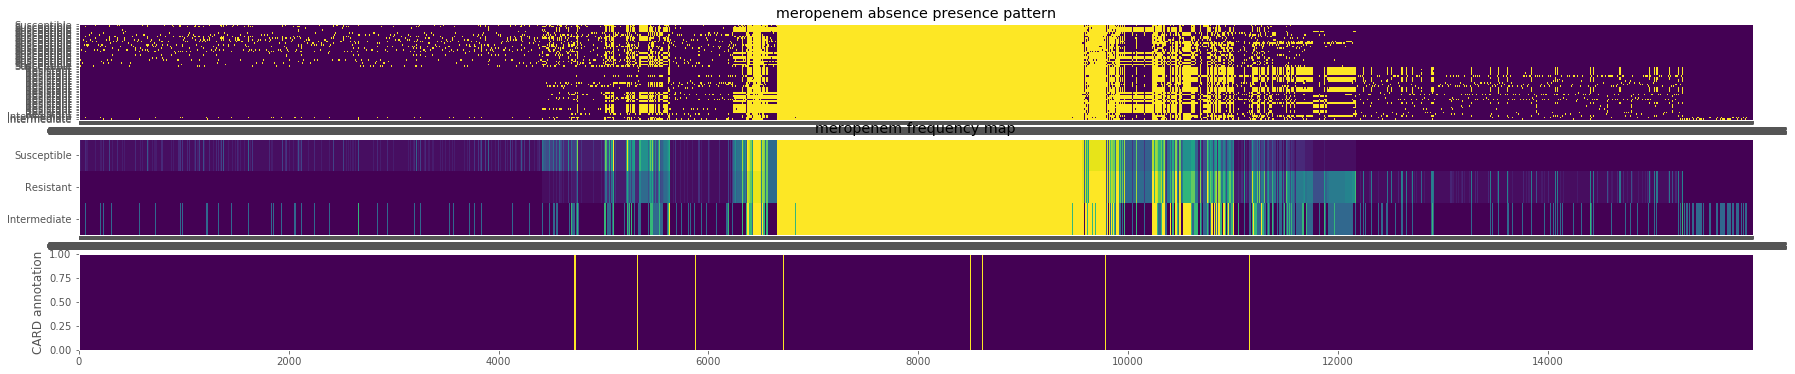

In [65]:
stra_by_abx("meropenem")


pattern not prominent, why?
1. these rare genes are Noise?
2. because CARD annotation include all annotation, stratify with "determinant of": meropenem 
3. blast all cog to see what they are?
4. problem with cdhit not being about to see snp-level variance?

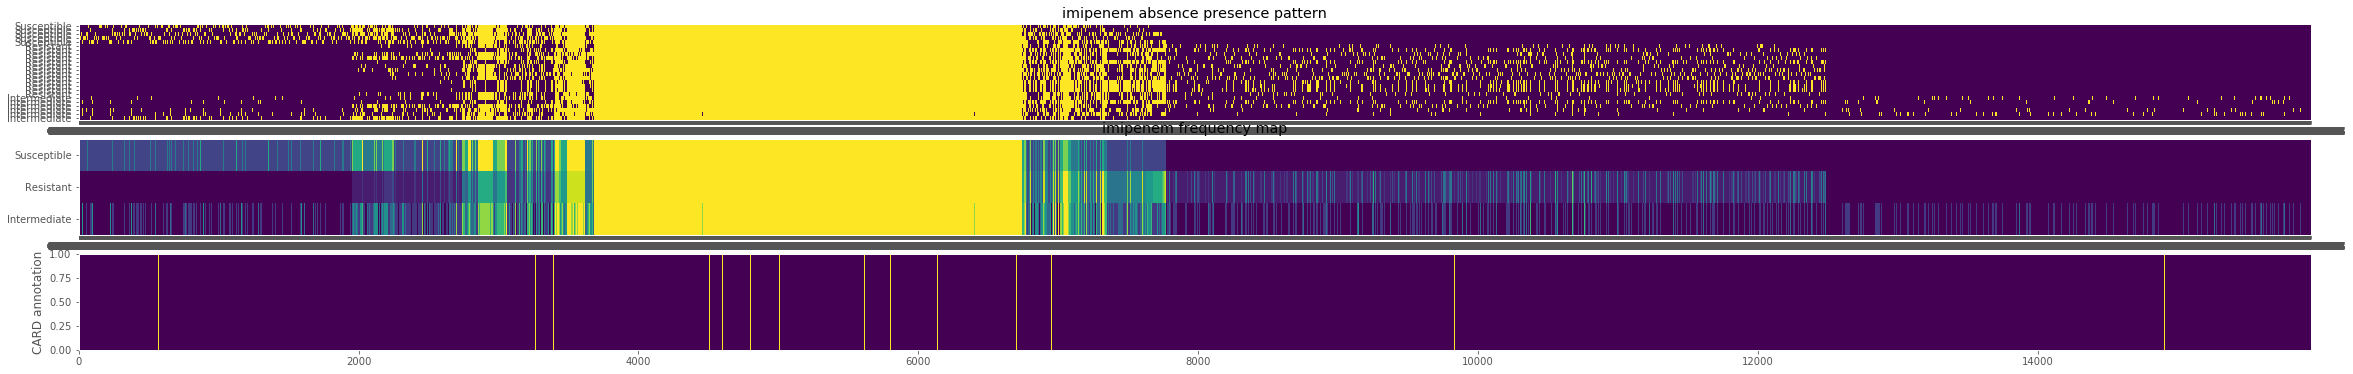

In [70]:
stra_by_abx("imipenem")

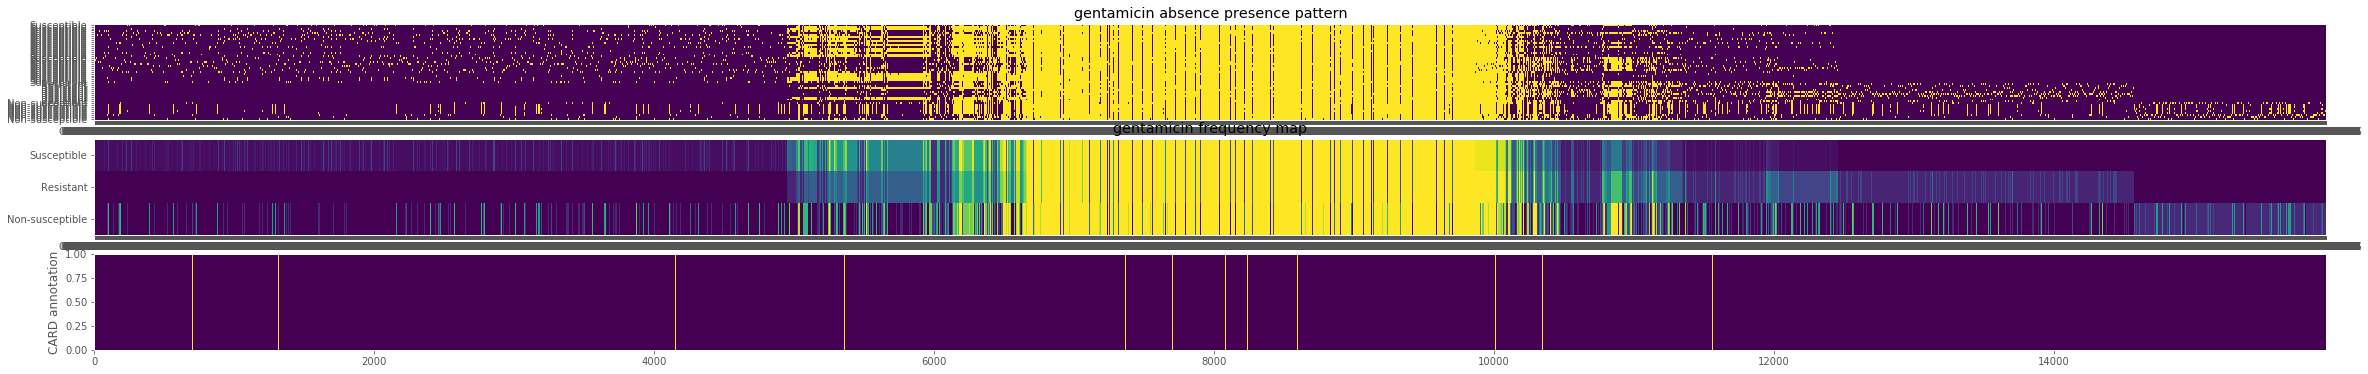

In [71]:
stra_by_abx("gentamicin")


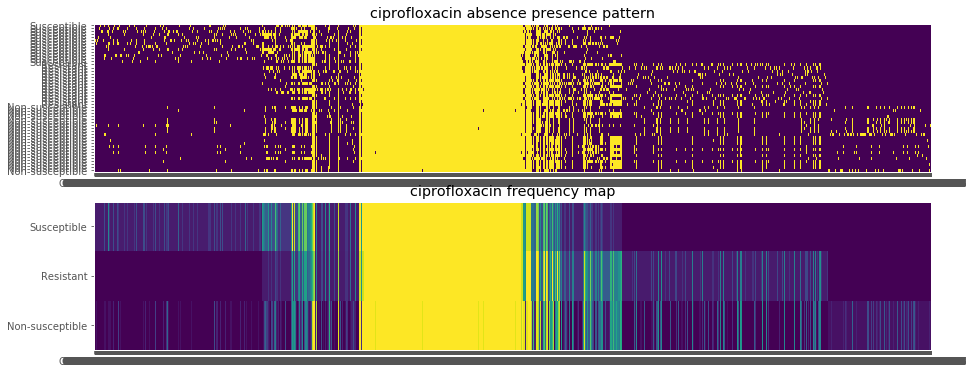

In [14]:
stra_by_abx("ciprofloxacin")


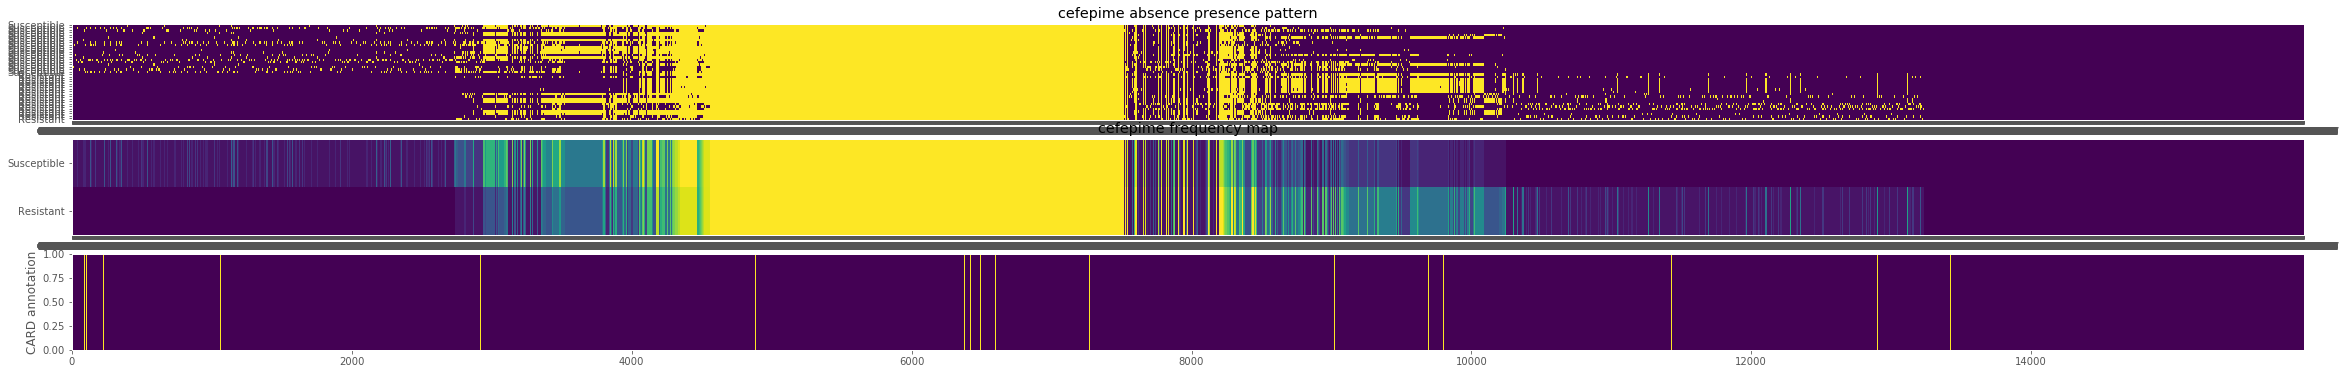

In [14]:
stra_by_abx("cefepime")

In [ ]:
stra_by_abx("cefazolin")

In [12]:
cluster_detail.head()

,representing gene length,representing gene header,mean similarity,mean length,member
Cluster 0,6925,JMVJ01000010_255|1438681.3,93.575,314.773,",JMVT01000001_310|1438693.3,JMVT01000001_310|1..."
Cluster 1,5901,JMVT01000001_309|1438693.3,85.7143,843,",JMVT01000001_309|1438693.3,JMVT01000001_309|1..."
Cluster 2,5423,AYIO01000007_135|1328432.3,66.6667,1807.67,",AYIO01000007_135|1328432.3,AYIO01000007_135|1..."
Cluster 3,3903,JAPE01000016_72|1400157.3,95.8007,86,",JAPE01000016_72|1400157.3,JMVT01000009_1|1438..."
Cluster 4,3709,JMVU01000017_403|1438694.3,90.1891,337.182,",JMVT01000007_404|1438693.3,JMVT01000008_1|143..."


In [28]:
# examine card contribution
def card_in_cluster(cluster_name):
    members = cluster_detail.loc[cluster_name, 'member'].split(',')[1:] # the first element is ''
    count = 0
    for mem in members:
        genome_id = mem.split('|')[1]
        protein_id = mem.split('|')[0]
        
        df = pd.read_pickle("../../cdhitResult/card_detail_df/"+genome_id)
        if protein_id in df.index:
            count += 1
        
        return(count/len(members))
        

In [17]:
cluster_detail.index

Index(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',
       'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9',
       ...
       'Cluster 15940', 'Cluster 15941', 'Cluster 15942', 'Cluster 15943',
       'Cluster 15944', 'Cluster 15945', 'Cluster 15946', 'Cluster 15947',
       'Cluster 15948', 'Cluster 15949'],
      dtype='object', length=15950)

In [32]:
for clu in cluster_detail.index:
    cluster_detail.loc[clu, "card_portion"] = card_in_cluster(clu)

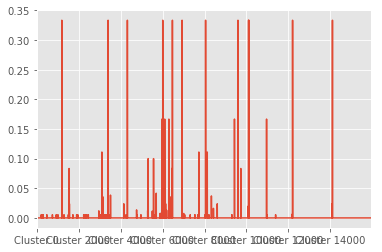

In [59]:
cluster_detail['card_portion'].plot()

In [60]:
def rs_card_ratio(abx):
    abx_choose = df_ris.loc[df_ris['Antibiotic'] == abx]
    
    freq = abx_choose.groupby(by = "Resistant Phenotype").mean() #frequency == 1: core genome
    freq_only_cluster = freq.iloc[:, 0:15949]
    freq_only_cluster = freq_only_cluster.loc[freq_only_cluster['Cluster 1'].notnull()]
    
    ratio = freq_only_cluster.loc['Resistant', :]/freq_only_cluster.loc['Susceptible', :]
    i = ratio.sort_values().index

    
    sort = abx_choose.sort_values("Resistant Phenotype")
    only_cluster = sort.iloc[:,0:15949]
    
    
    
    plt.figure(figsize = (40,2))

    # card yes or no
    plt.subplot(2,1,1)
    yn = card_yn[i]
    plt.pcolor(yn, cmap = "magma")
    plt.ylabel('CARD abs')
    
    # card portion
    plt.subplot(2,1,2)
    sr = pd.DataFrame()
    sr = sr.append(cluster_detail['card_portion'])
    sr = sr[i]
    plt.pcolor(sr, cmap = "magma")
    plt.ylabel('CARD portion')
    
    
    plt.show()
    return(yn, sr)


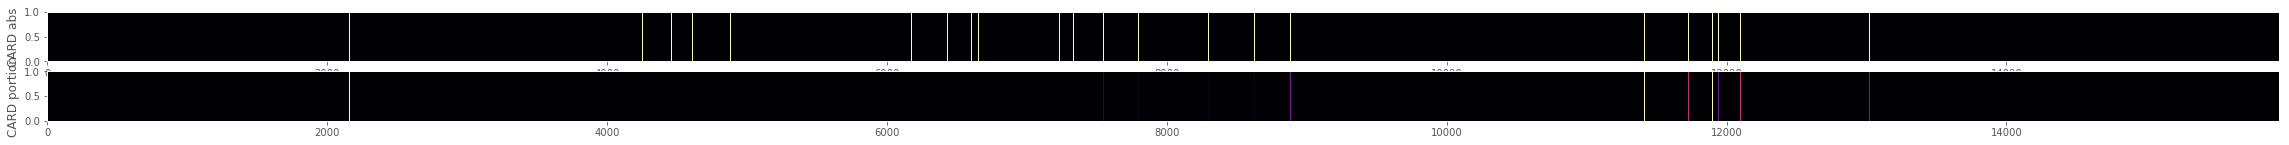

In [62]:
yn, sr = rs_card_ratio("cefepime")

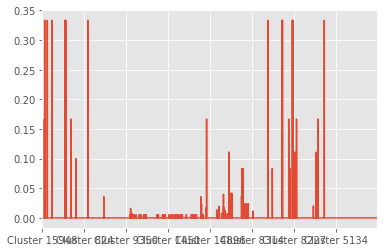

In [74]:
sr.loc['card_portion'].plot()
# cefepime

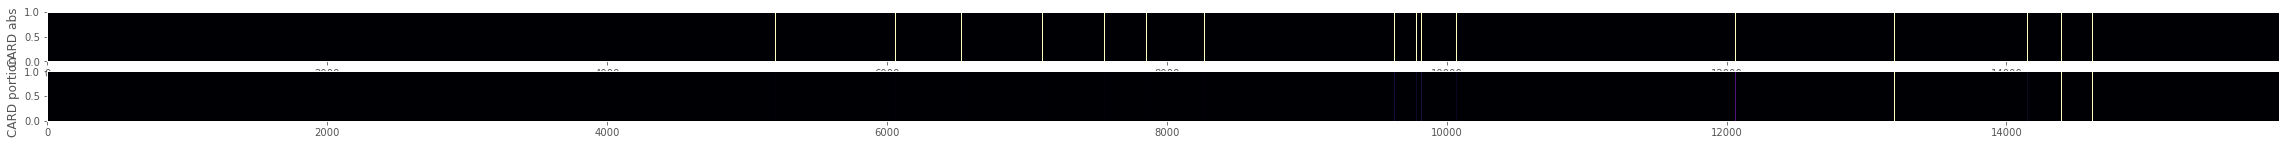

In [77]:
yn, sr = rs_card_ratio("ciprofloxacin")

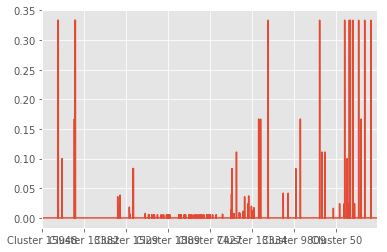

In [78]:
sr.loc['card_portion'].plot()

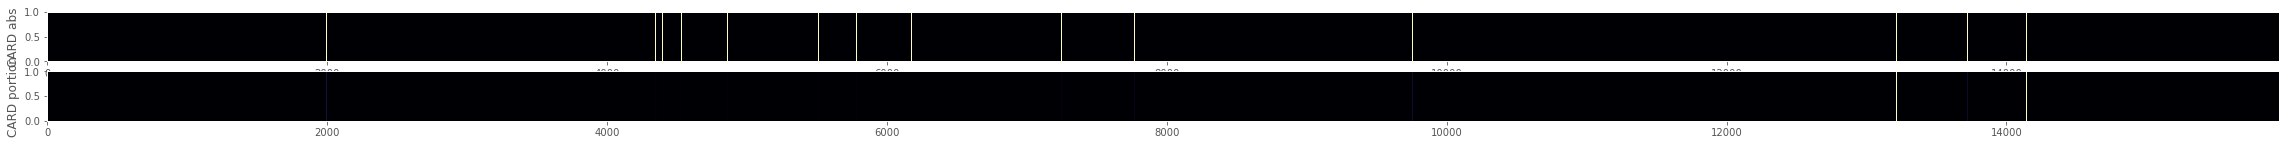

In [79]:
yn, sr = rs_card_ratio("levofloxacin")

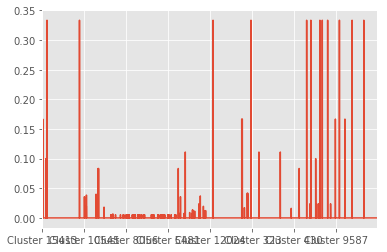

In [80]:
sr.loc['card_portion'].plot()

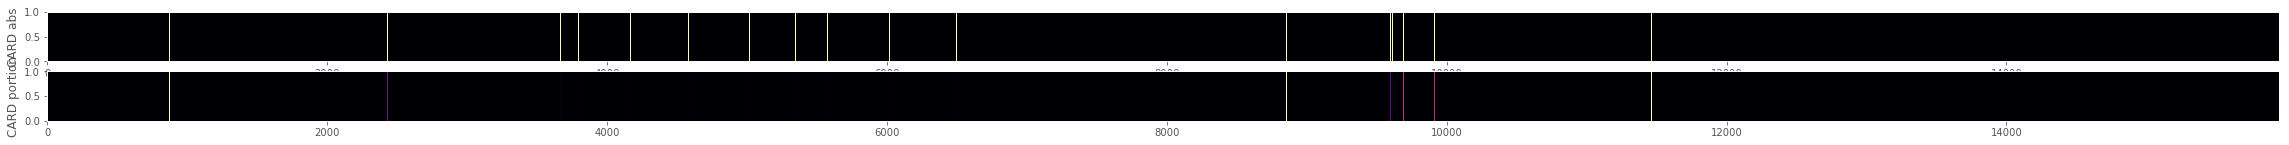

In [81]:
yn, sr = rs_card_ratio("imipenem")

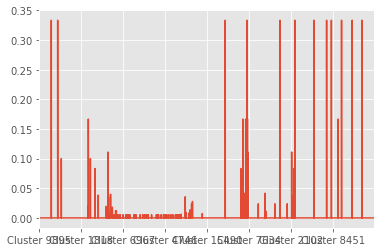

In [82]:
sr.loc['card_portion'].plot()
